# Temperature Change Prediction

## In this machine learning project, we aim to predict temperature changes using historical climate data and advanced predictive models.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Making a dataframe

In [2]:
df=pd.read_csv('Agrofood_co2_emission.csv')

### Overview of the dataset

In [3]:
df.head()

,Area,Year,Savanna fires,Forest fires,Drained organic soils (CO2),Pesticides Manufacturing,Net Forest conversion,On-farm Electricity Use,Agrifood Systems Waste Disposal,Fertilizers Manufacturing,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,0.0,11.807483,0.0,14.2666,691.7888,11.9970,260.1431,1590.5319,319.1763,NaN,9655167,2593947,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,0.0,11.712073,0.0,11.4182,710.8212,12.8539,268.6292,1657.2364,342.3079,NaN,10230490,2763167,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,0.0,11.712073,0.0,9.2752,743.6751,13.4929,264.7898,1653.5068,349.1224,NaN,10995568,2985663,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,0.0,11.712073,0.0,9.0635,791.9246,14.0559,261.7221,1642.9623,352.2947,NaN,11858090,3237009,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,0.0,11.712073,0.0,8.3962,831.9181,15.1269,267.6219,1689.3593,367.6784,NaN,12690115,3482604,7733458.0,7722096.0,2500.768729,0.372250


## Performing EDA steps:

### Dataset contains a total od 20 Columns and 6965 rows 
### Only first column of the dataset is an object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Drained organic soils (CO2)      6965 non-null   float64
 5   Pesticides Manufacturing         6965 non-null   float64
 6   Net Forest conversion            6472 non-null   float64
 7   On-farm Electricity Use          6965 non-null   float64
 8   Agrifood Systems Waste Disposal  6965 non-null   float64
 9   Fertilizers Manufacturing        6965 non-null   float64
 10  Manure applied to Soils          6037 non-null   float64
 11  Manure left on Pasture           6965 non-null   float64
 12  Manure Management   

##### isnull() function shows their are missing values in Savana fires, Forest fires, Net Forest conversion, Manure applied to Soils, On-farm energy use column

In [5]:
df.isnull().sum()

Area                                 0
Year                                 0
Savanna fires                       31
Forest fires                        93
Drained organic soils (CO2)          0
Pesticides Manufacturing             0
Net Forest conversion              493
On-farm Electricity Use              0
Agrifood Systems Waste Disposal      0
Fertilizers Manufacturing            0
Manure applied to Soils            928
Manure left on Pasture               0
Manure Management                  928
On-farm energy use                 956
Rural population                     0
Urban population                     0
Total Population - Male              0
Total Population - Female            0
total_emission                       0
Average Temperature °C               0
dtype: int64

### Here we have the percentage of the missing values from the columns
### From this we can decide if we can fill the missing values or the column needs to be dropped

In [6]:
df.isnull().sum()/len(df)*100

Area                                0.000000
Year                                0.000000
Savanna fires                       0.445083
Forest fires                        1.335248
Drained organic soils (CO2)         0.000000
Pesticides Manufacturing            0.000000
Net Forest conversion               7.078248
On-farm Electricity Use             0.000000
Agrifood Systems Waste Disposal     0.000000
Fertilizers Manufacturing           0.000000
Manure applied to Soils            13.323762
Manure left on Pasture              0.000000
Manure Management                  13.323762
On-farm energy use                 13.725772
Rural population                    0.000000
Urban population                    0.000000
Total Population - Male             0.000000
Total Population - Female           0.000000
total_emission                      0.000000
Average Temperature °C              0.000000
dtype: float64

### Handling the missing values from the columns

In [7]:
sf=df['Savanna fires'].mean()
df["Savanna fires"].fillna(sf,inplace=True)
ff=df['Forest fires'].mean()
df["Forest fires"].fillna(ff,inplace=True)
nfc=df['Net Forest conversion'].mean()
df["Net Forest conversion"].fillna(nfc,inplace=True)
mas=df['Manure applied to Soils'].mean()
df["Manure applied to Soils"].fillna(mas,inplace=True)
mm=df['Manure Management'].mean()
df["Manure Management"].fillna(mm,inplace=True)
ome=df['On-farm energy use'].mean()
df["On-farm energy use"].fillna(ome,inplace=True)

### Looking if their are still any missing values reamining
### All the missing values have been handled and their are no missing values in the dataset

In [8]:
df.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Net Forest conversion              0
On-farm Electricity Use            0
Agrifood Systems Waste Disposal    0
Fertilizers Manufacturing          0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
On-farm energy use                 0
Rural population                   0
Urban population                   0
Total Population - Male            0
Total Population - Female          0
total_emission                     0
Average Temperature °C             0
dtype: int64

### Plotting Histogram for the feature - Average Temperature in the dataset
### This is a Normal Distribution with no outliers 

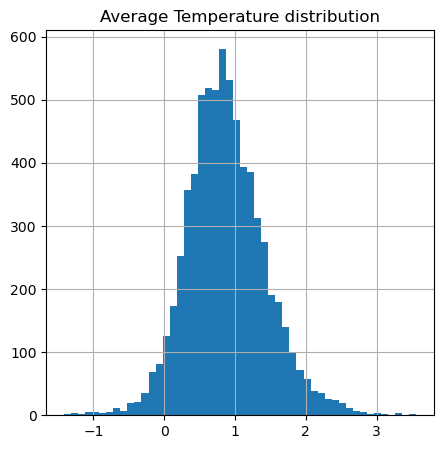

In [11]:
plt.figure(figsize=(5,5))
plt.hist(df['Average Temperature °C'],bins=50)
plt.title('Average Temperature distribution')
plt.grid()
plt.show()

In [12]:
df.corr()

,Year,Savanna fires,Forest fires,Drained organic soils (CO2),Pesticides Manufacturing,Net Forest conversion,On-farm Electricity Use,Agrifood Systems Waste Disposal,Fertilizers Manufacturing,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
Year,1.000000,-0.011884,-0.008841,0.004470,0.023444,-0.022934,0.027851,0.016250,0.036882,0.004439,0.025033,0.000283,-0.007750,-0.002781,0.050259,0.021208,0.021612,0.041861,0.545932
Savanna fires,-0.011884,1.000000,0.506980,0.016872,0.060787,0.225827,-0.008393,0.025231,-0.022988,0.014782,0.255156,0.026626,0.021887,0.000406,0.021620,0.008363,0.010888,0.128669,-0.046508
Forest fires,-0.008841,0.506980,1.000000,0.107911,0.052928,0.419284,0.052236,0.114180,0.010724,0.080093,0.185568,0.064656,0.049890,0.077860,0.084817,0.082469,0.086352,0.238671,-0.037813
Drained organic soils (CO2),0.004470,0.016872,0.107911,1.000000,0.161667,0.215765,0.056580,0.244534,0.103802,0.216540,0.102060,0.215514,0.182998,0.104755,0.183084,0.139708,0.148775,0.292664,0.029030
Pesticides Manufacturing,0.023444,0.060787,0.052928,0.161667,1.000000,0.151752,0.601523,0.745333,0.739782,0.840545,0.705042,0.872672,0.811064,0.600570,0.798785,0.703552,0.712985,0.746777,0.027960
Net Forest conversion,-0.022934,0.225827,0.419284,0.215765,0.151752,1.000000,-0.010064,0.230419,-0.000287,0.159040,0.494447,0.077241,0.081487,0.033018,0.139365,0.078990,0.085137,0.429578,-0.030748
On-farm Electricity Use,0.027851,-0.008393,0.052236,0.056580,0.601523,-0.010064,1.000000,0.854828,0.725068,0.790574,0.652986,0.798688,0.666037,0.911887,0.861487,0.927617,0.923903,0.692060,0.009081
Agrifood Systems Waste Disposal,0.016250,0.025231,0.114180,0.244534,0.745333,0.230419,0.854828,1.000000,0.831321,0.915194,0.802383,0.883689,0.813623,0.917594,0.955124,0.966827,0.969805,0.879840,0.008995
Fertilizers Manufacturing,0.036882,-0.022988,0.010724,0.103802,0.739782,-0.000287,0.725068,0.831321,1.000000,0.878136,0.565999,0.841307,0.882490,0.745977,0.900410,0.837725,0.841563,0.816064,0.041462
Manure applied to Soils,0.004439,0.014782,0.080093,0.216540,0.840545,0.159040,0.790574,0.915194,0.878136,1.000000,0.760828,0.975795,0.925890,0.820538,0.933990,0.896424,0.903767,0.841109,0.041498


### Correlation between the features using heatmap

In [13]:
corr=df.corr()

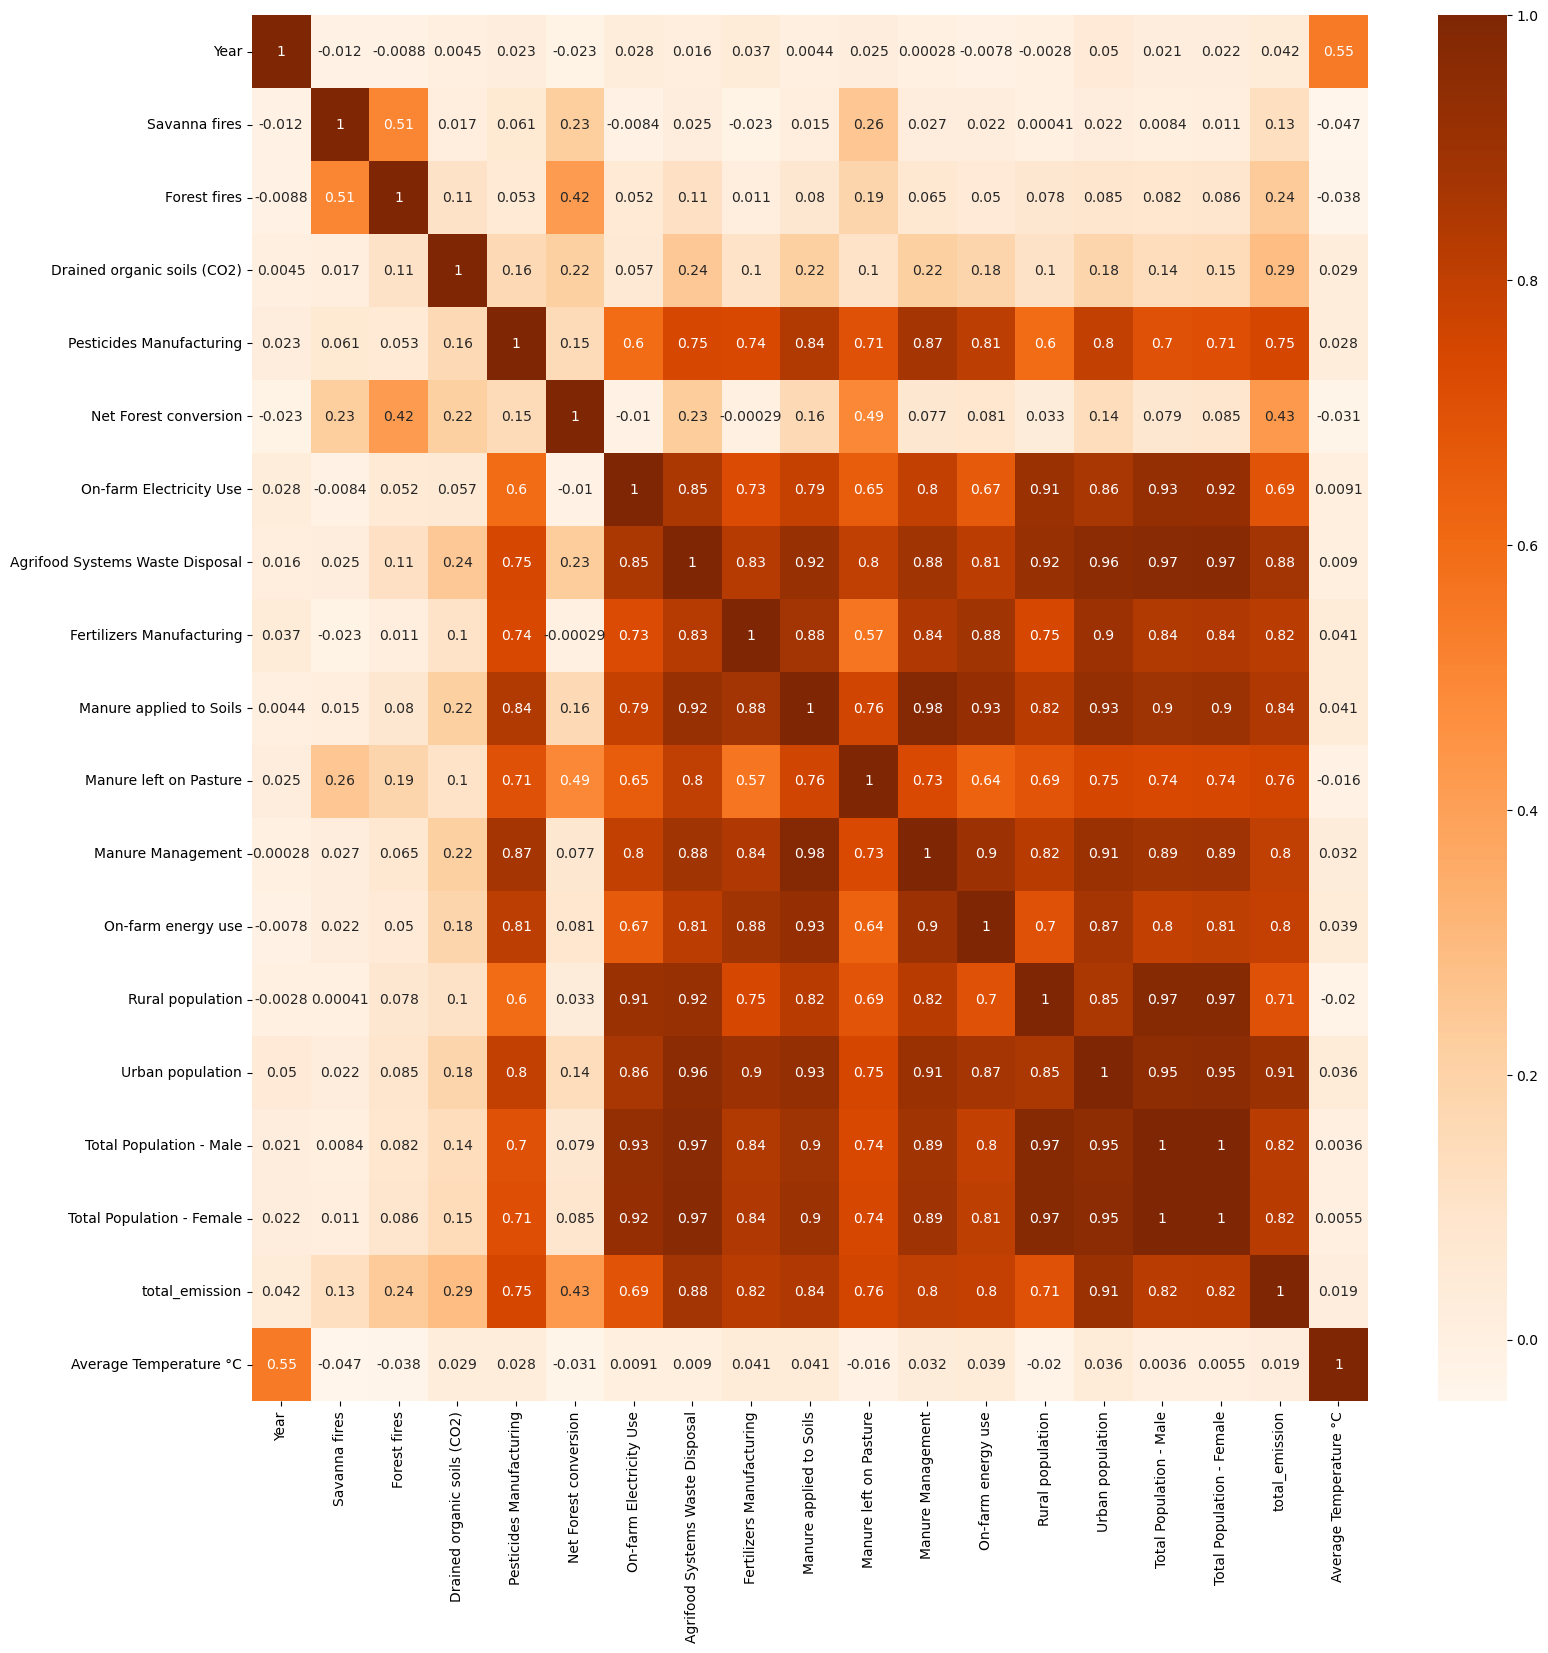

In [14]:
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,cmap='Oranges')
plt.show()

### Plotting pie chart to show total population of male and total population of female in percentage from dataset. Their are almot equal percentage of Male and Female in the dataset

In [15]:
pc=df[['Total Population - Male','Total Population - Female']].loc[df['Year']==2020].sum()

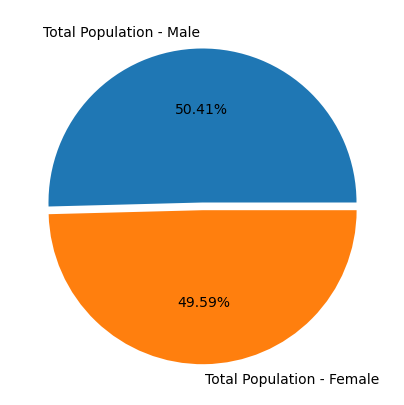

In [16]:
plt.figure(figsize=(5,5))
pc.plot.pie(autopct="%1.2f%%",explode=(0,0.05))
plt.show()

### Splitting dataset into features and target column using iloc() funtion

In [17]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

### Again splitting dataset into training  and testing

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [19]:
xtest

,Year,Savanna fires,Forest fires,Drained organic soils (CO2),Pesticides Manufacturing,Net Forest conversion,On-farm Electricity Use,Agrifood Systems Waste Disposal,Fertilizers Manufacturing,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
5275,2003,20.7740,0.0000,1723.8559,6.000000,1036.6542,9.236400,2684.287000,2286.630049,31.1061,532.6095,71.1727,31.844900,7213040,1467306,4110419.0,4457573.0,8482.052729
1653,2010,34.4454,28.8801,0.0000,81.872042,0.0000,222.855000,3106.658000,86.052200,275.0068,1990.1010,369.8420,2969.090400,2652264,8680787,5637179.0,5653239.0,4508.679942
1954,2001,0.0000,0.0000,0.0000,93.000000,0.0000,997.227200,13972.293400,3433.682800,156.6656,4653.8299,468.1363,2367.502200,40711513,30515427,36896146.0,35958115.0,68673.081500
634,2010,14.5999,56.2721,154.6402,11.000000,3067.7020,3.820700,225.284900,5709.016057,5.0137,42.5608,6.7904,58.296400,176152,145456,161229.0,160877.0,9796.625452
2263,2005,0.0511,0.0000,12288.4957,36.000000,23207.6203,212.052100,1659.951100,417.164700,291.7511,193.7609,761.3230,1666.601200,899025,4359902,2567205.0,2678866.0,6202.732071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,2011,2.6992,0.2610,26416.3450,386.000000,0.0000,1754.102800,8098.364300,1283.606300,2866.7617,4273.5019,5506.5307,1461.530300,11760347,52051535,31082938.0,32203425.0,132623.725400
434,1994,10.3442,45.7301,0.0000,10.000000,0.0000,45.341600,240.484800,1470.693915,2.2956,4.0619,2.0209,28.859600,53137,222758,144309.0,149688.0,2608.205008
6252,2019,0.0000,0.0000,0.0000,137.416960,0.0000,591.101589,85.683112,2012.447178,0.0490,0.0007,0.4329,3008.982252,1340,0,879.0,874.0,7258.567929
6004,2017,14.0661,1.9433,641.5564,15.000000,8572.7871,7.574700,84.897200,3643.181569,12.5621,26.8789,12.6059,337.011400,191326,372076,293536.0,294024.0,14287.513390


In [20]:
ytest

5275    0.898833
1653    0.712500
1954    0.611917
634     0.585833
2263    1.970750
          ...   
6550    1.295000
434     0.885083
6252    1.114239
6004    1.431667
3878    1.001750
Name: Average Temperature °C, Length: 2090, dtype: float64

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Applying Linear Regression Algorithm
#### Importing Linear Regression Library

In [22]:
from sklearn.linear_model import LinearRegression

mr=LinearRegression()
mr.fit(xtrain,ytrain)
ypred=mr.predict(xtest)
print("mean absolute error:",mean_absolute_error(ytest,ypred))
print("mean squared error:",mean_squared_error(ytest,ypred))
print("root mean squared error:",np.sqrt(mean_squared_error(ytest,ypred)))
print("r2-score:",r2_score(ytest,ypred))

mean absolute error: 0.34840817983194916
mean squared error: 0.21068826671405633
root mean squared error: 0.4590079157422629
r2-score: 0.3252561533107615


### Applying Decision Tree Algorithm
#### Importing Decision Tree Library

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt1=DecisionTreeRegressor()
dt1.fit(xtrain,ytrain)
ypred1=dt1.predict(xtest)
ypred1
print("mean absolute error:",mean_absolute_error(ytest,ypred1))
print("mean squared error:",mean_squared_error(ytest,ypred1))
print("root mean squared error:",np.sqrt(mean_squared_error(ytest,ypred1)))
print("R2 score:",r2_score(ytest,ypred1))

mean absolute error: 0.3554855165827751
mean squared error: 0.250128166084286
root mean squared error: 0.5001281496619502
R2 score: 0.1989471289443382


In [24]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    rr=r2_score(ytest,ypred)
    
    print(f'R2_score {rr}')

In [25]:
for i in range(1,30):
    dt2=DecisionTreeRegressor(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    rr=r2_score(ytest,ypred)
    print(f'max_depth = {i} accuracy = {rr}')

max_depth = 1 accuracy = 0.2094617011415556
max_depth = 2 accuracy = 0.3321183976821117
max_depth = 3 accuracy = 0.3564973071875509
max_depth = 4 accuracy = 0.3868757967240123
max_depth = 5 accuracy = 0.3991069272481079
max_depth = 6 accuracy = 0.41789021086959866
max_depth = 7 accuracy = 0.41540202915619295
max_depth = 8 accuracy = 0.4151302233672156
max_depth = 9 accuracy = 0.42849651963913615
max_depth = 10 accuracy = 0.4207848593691006
max_depth = 11 accuracy = 0.36448139786709677
max_depth = 12 accuracy = 0.3282815393661612
max_depth = 13 accuracy = 0.3129195098787345
max_depth = 14 accuracy = 0.28868832450214454
max_depth = 15 accuracy = 0.2680666126442808
max_depth = 16 accuracy = 0.24599388796973365
max_depth = 17 accuracy = 0.23502330601354637
max_depth = 18 accuracy = 0.20584270558063322
max_depth = 19 accuracy = 0.2208670373428896
max_depth = 20 accuracy = 0.20188482537574282
max_depth = 21 accuracy = 0.20235052212549687
max_depth = 22 accuracy = 0.20598426318688756
max_dept

In [26]:
dt3=DecisionTreeRegressor(max_depth=5)
mymodel(dt3)

R2_score 0.3991069272481079


In [27]:
dt3.score(xtest,ytest)

0.3991069272481079

In [28]:
dt3.score(xtrain,ytrain)

0.47127487701893245

In [29]:
for i in range(31,60):
    dt4=DecisionTreeRegressor(max_depth=i)
    dt4.fit(xtrain,ytrain)
    ypred=dt4.predict(xtest)
    rr=r2_score(ytest,ypred)
    print(f'max_depth = {i} accuracy = {rr}')

max_depth = 31 accuracy = 0.18870316513295993
max_depth = 32 accuracy = 0.2075050483587425
max_depth = 33 accuracy = 0.17298238209072014
max_depth = 34 accuracy = 0.20503872728302752
max_depth = 35 accuracy = 0.202778735148478
max_depth = 36 accuracy = 0.19067522488845767
max_depth = 37 accuracy = 0.18692806165538955
max_depth = 38 accuracy = 0.20172198624381432
max_depth = 39 accuracy = 0.19333626061684528
max_depth = 40 accuracy = 0.19391016285340157
max_depth = 41 accuracy = 0.19452049722650555
max_depth = 42 accuracy = 0.21775325025244974
max_depth = 43 accuracy = 0.21002894202742706
max_depth = 44 accuracy = 0.19181168329427467
max_depth = 45 accuracy = 0.20699073093629028
max_depth = 46 accuracy = 0.19920512844785643
max_depth = 47 accuracy = 0.2011790859553002
max_depth = 48 accuracy = 0.17278816361369298
max_depth = 49 accuracy = 0.1912473229758458
max_depth = 50 accuracy = 0.19756358704532906
max_depth = 51 accuracy = 0.22087213744335188
max_depth = 52 accuracy = 0.19177227373

In [30]:
dt5=DecisionTreeRegressor(max_depth=5)
mymodel(dt5)

R2_score 0.39910692724810803


In [31]:
dt5.score(xtest,ytest)

0.39910692724810803

In [32]:
dt5.score(xtrain,ytrain)

0.47127487701893256

### Applying Random Forest Algorithm
#### Importing Random Forest Library

In [33]:
from sklearn.ensemble import RandomForestRegressor

rs=RandomForestRegressor()
rs.fit(xtrain,ytrain)
ypred1=rs.predict(xtest)
ypred1
print("mean absolute error:",mean_absolute_error(ytest,ypred1))
print("mean squared error:",mean_squared_error(ytest,ypred1))
print("root mean squared error:",np.sqrt(mean_squared_error(ytest,ypred1)))
print("R2 score:",r2_score(ytest,ypred1))

mean absolute error: 0.26977413134229666
mean squared error: 0.13823590026114818
root mean squared error: 0.37180088792409866
R2 score: 0.557289902530039


In [34]:
for i in range(1,10):
    rf1=RandomForestRegressor(max_depth=i)
    rf1.fit(xtrain,ytrain)
    ypred=rf1.predict(xtest)
    rr=r2_score(ytest,ypred)
    print(f'max_depth = {i} accuracy = {rr}')

max_depth = 1 accuracy = 0.2569166529059391
max_depth = 2 accuracy = 0.33733240494756567
max_depth = 3 accuracy = 0.3779897879658576
max_depth = 4 accuracy = 0.4190171845424093
max_depth = 5 accuracy = 0.44929781068680064
max_depth = 6 accuracy = 0.47999832019608424
max_depth = 7 accuracy = 0.5126452281386535
max_depth = 8 accuracy = 0.5357183293373803
max_depth = 9 accuracy = 0.5445894718591167


In [35]:
rf2=RandomForestRegressor(max_depth=6)
mymodel(rf2)

R2_score 0.4816283740693549


In [36]:
rf2.score(xtest,ytest)

0.4816283740693549

In [37]:
rf2.score(xtrain,ytrain)

0.5683388268774606

In [38]:
for i in range(1,30):
    rf3=RandomForestRegressor(min_samples_leaf=i)
    rf3.fit(xtrain,ytrain)
    ypred=rf3.predict(xtest)
    rr=r2_score(ytest,ypred)
    print(f'min_leaf = {i} accuracy = {rr}')

min_leaf = 1 accuracy = 0.5575988843866708
min_leaf = 2 accuracy = 0.5584941230454267
min_leaf = 3 accuracy = 0.5612126153583061
min_leaf = 4 accuracy = 0.558987550335809
min_leaf = 5 accuracy = 0.5610207651434459
min_leaf = 6 accuracy = 0.5591498149519463
min_leaf = 7 accuracy = 0.56051024258701
min_leaf = 8 accuracy = 0.5512767300014975
min_leaf = 9 accuracy = 0.5477751969326918
min_leaf = 10 accuracy = 0.547152219776279
min_leaf = 11 accuracy = 0.5439374269659689
min_leaf = 12 accuracy = 0.5411771085076895
min_leaf = 13 accuracy = 0.5378582075013351
min_leaf = 14 accuracy = 0.5382245049785739
min_leaf = 15 accuracy = 0.5316805726338755
min_leaf = 16 accuracy = 0.5307550913519354
min_leaf = 17 accuracy = 0.5287048920814738
min_leaf = 18 accuracy = 0.5292472834408335
min_leaf = 19 accuracy = 0.5253578178465371
min_leaf = 20 accuracy = 0.5202057317561186
min_leaf = 21 accuracy = 0.5187845173594188
min_leaf = 22 accuracy = 0.5158720026049886
min_leaf = 23 accuracy = 0.5104450767936861
m

In [39]:
rf3=RandomForestRegressor(min_samples_leaf=52)
mymodel(rf3)

R2_score 0.46023663106788726


In [40]:
rf3.score(xtest,ytest)

0.46023663106788726

In [41]:
rf3.score(xtrain,ytrain)

0.5273427613115338

In [42]:
for i in range(2,10):
    rf5=RandomForestRegressor(min_samples_split=i)
    rf5.fit(xtrain,ytrain)
    ypred7=rf5.predict(xtest)
    rr=r2_score(ytest,ypred7)
    print(f'min_leaf = {i} accuracy = {rr}')

min_leaf = 2 accuracy = 0.5535533932565189
min_leaf = 3 accuracy = 0.5538086410018499
min_leaf = 4 accuracy = 0.5511961110910837
min_leaf = 5 accuracy = 0.5553202113584861
min_leaf = 6 accuracy = 0.5557651891330757
min_leaf = 7 accuracy = 0.5591099747387787
min_leaf = 8 accuracy = 0.5527283662041499
min_leaf = 9 accuracy = 0.5622977144778823


In [43]:
rf5=RandomForestRegressor(min_samples_leaf=10)
mymodel(rf5)

R2_score 0.5455169554856245


In [44]:
rf5.score(xtest,ytest)

0.5455169554856245

In [45]:
rf5.score(xtrain,ytrain)

0.7314929405536994

### Applying XG Boost Algorithm
#### Importing XG Boost Library

In [46]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
ypred
print("mean absolute error:",mean_absolute_error(ytest,ypred))
print("mean squared error:",mean_squared_error(ytest,ypred))
print("root mean squared error:",np.sqrt(mean_squared_error(ytest,ypred)))
print("R2 score:",r2_score(ytest,ypred))

mean absolute error: 0.2718606478574955
mean squared error: 0.13743430478568527
root mean squared error: 0.37072133036242366
R2 score: 0.5598570678641038
